# Face recognition using SVM and kernel trick

# Dataset description

This assignment asks you to build a classifier trained on face images. First, let's load the required dataset and see what it is. 

The table contains "straightened" representations of images of people's faces.

Initially, each image is a matrix of size $62 \times 47$ whose values are presumably normalized to a range $[0, 1]$ from the range $[0, 255] \cap \mathbb Z$. The values themselves are responsible for the intensity of the pixel: the larger the value, the lighter the pixel.

Note, from the image (or, what is the same thing, matrix) of size $62 \times 47$ we get a vector of $2914 = 62 \cdot 47$ length.

The column <code>label</code> is responsible for the name of the person depicted in the picture.

In [2]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('/Users/lune/Education/Machine learning/SVM/persons_pics_train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,label
0,0.379085,0.312418,0.352941,0.445752,0.466667,0.473203,0.484967,0.513725,0.545098,0.571242,...,0.597386,0.620915,0.732026,0.852288,0.921569,0.937255,0.941176,0.950327,0.946405,John Ashcroft
1,0.450980,0.466667,0.512418,0.509804,0.450980,0.458824,0.516340,0.571242,0.607843,0.618301,...,0.430065,0.453595,0.679739,0.934640,0.985621,0.981699,0.963399,0.938562,0.874510,Ariel Sharon
2,0.589542,0.614379,0.688889,0.729412,0.738562,0.775163,0.789543,0.806536,0.820915,0.837908,...,0.733333,0.854902,0.937255,0.624837,0.128105,0.082353,0.107190,0.095425,0.100654,Colin Powell
3,0.390850,0.432680,0.499346,0.562091,0.597386,0.644444,0.670588,0.650980,0.637908,0.639216,...,0.713726,0.898039,0.968627,0.959477,0.832680,0.443137,0.266667,0.303268,0.313725,Jean Chretien
4,0.645752,0.626144,0.605229,0.585621,0.602614,0.664052,0.701961,0.709804,0.733333,0.771242,...,0.115033,0.129412,0.132026,0.129412,0.155556,0.171242,0.167320,0.176471,0.183007,Colin Powell


Let's make sure that we actually see images of people's faces. Let's take the first $15$ rows from the initial dataframe and build the images corresponding to them.

In [5]:
import matplotlib.pyplot as plt

def get_img_by_row(row):
  return row.drop('label').astype(float).to_numpy().reshape(62,47), row['label']

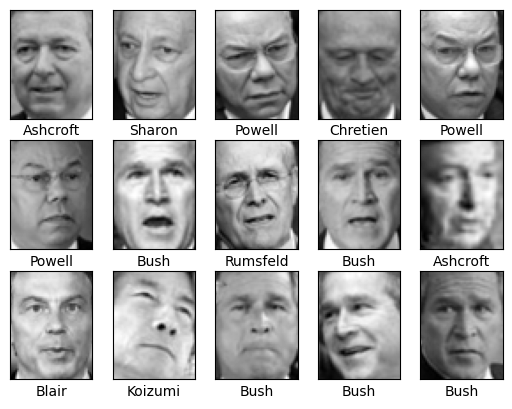

In [6]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
plt.savefig('persons_pics_img_for_description.png', dpi = 300, bbox_inches='tight')    

Larger

(-0.5, 46.5, 61.5, -0.5)

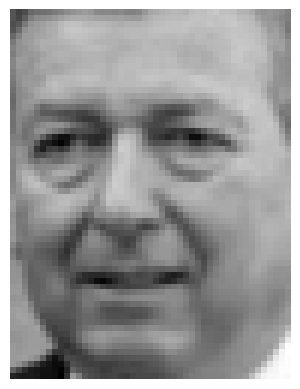

In [7]:
plt.imshow(df.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

# A bit of mischief

Determine the number of different people whose pictures are contained in the dataset.

In [12]:
# < ENTER YOUR CODE HERE > 
df.shape

(1326, 2915)

Construct a histogram of the distribution of objects by class and calculate the proportion of objects in each class.

In [22]:
# < ENTER YOUR CODE HERE > 
round(df['label'].value_counts(normalize=True)['Gerhard Schroeder'],3)

0.07

Based on the available data, match each person with one vector whose coordinates are the average of the corresponding coordinates of all vectors identified with that person.

In [29]:
# < ENTER YOUR CODE HERE > 
df_mean = df.groupby('label').mean()

Enter the coordinate with index $0$ of the average vector corresponding to the person in your individual assignment.

In [35]:
# < ENTER YOUR CODE HERE > 
round(df_mean.loc['Gerhard Schroeder','0'],3)

0.21

Using the average vectors, construct pictures of all the people in the dataset.

In [39]:
df_mean['label'] = df_mean.index

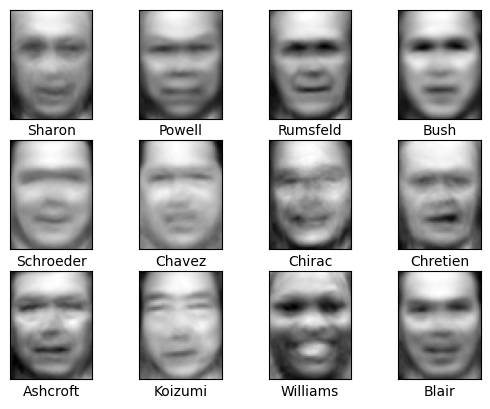

In [42]:
# < ENTER YOUR CODE HERE > 
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df_mean.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])


The so-called [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) is often used as a measure of the "similarity" of two objects. It should not be confused with cosine distance.

Construct a similarity matrix of objects based on their averaged vectors. We recommend using a heat map for visualization, e.g. [from the seaborn library](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

<Axes: xlabel='label', ylabel='label'>

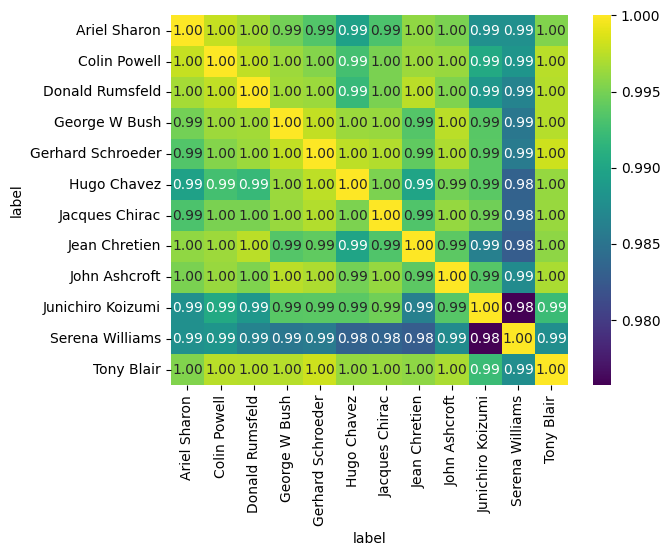

In [51]:
# < ENTER YOUR CODE HERE > 
# Group by 'label' and calculate the mean for each class
df_mean = df.groupby('label').mean()

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(df_mean)
cosine_sim_matrix

# Convert the cosine similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df_mean.index, columns=df_mean.index)
cosine_sim_df

# Create a heatmap using Seaborn
sns.heatmap(cosine_sim_df, cmap='viridis', annot=True, fmt=".2f")

Determine the cosine similarity for a pair of people from your individual assignment based on their corresponding "average" vectors.

In [ ]:
# < ENTER YOUR CODE HERE > 
round(cosine_sim_df.loc["Gerhard Schroeder",'Hugo Chavez'],3)

# Построение модели

Use <code>train_test_split()</code> to split the dataset into training and test samples with the parameters from your individual assignment. Use stratification by column <code>label</code>.

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# < ENTER YOUR CODE HERE > 
train_data, test_data = train_test_split(df, test_size=0.2, random_state=7, stratify=df['label'])
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

## First approximation: a basic SVM classifier with a linear kernel

Train the <code>SVC()</code> model on the training dataset with the parameters from your individual assignment.

In [66]:
from sklearn.svm import SVC

In [67]:
# < ENTER YOUR CODE HERE > 
model = SVC(kernel='linear', random_state=7)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=7)

Evaluate the model on test dataset. Compute <code>f1_score(average='weighted')</code>.

In [69]:
from sklearn.metrics import f1_score

In [70]:
# < ENTER YOUR CODE HERE > 
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.7414860718599269

In [71]:
round(f1, 3)

0.741

Overall, a pretty good result, but it makes sense to try to tweak the parameters.

## Selection of hyperparameters

Using <code>GridSearchCV()</code>, perform a hyperparameter selection based on the values from your individual assignment. Observe the training time of the models.

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# < ENTER YOUR CODE HERE > 

# Define the tuned parameters
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],
                     'class_weight': [None, 'balanced'],
                     'random_state': [7]}]

# Create a GridSearchCV object
cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)

# Fit the model to the training data
cv.fit(X_train, y_train)

# Print the best parameters
best_params = cv.best_params_
print(f"Best Parameters: {best_params}")

# Extract the value of C
best_C_value = best_params['C']
print(f"Value of C for the best model: {best_C_value}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.769 total time=   1.2s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.769 total time=   1.2s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.788 total time=   1.2s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.797 total time=   1.2s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.797 total time=   1.2s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.349 total time=   1.5s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.358 total time=   1.5s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.363 total time=   1.5s
[CV 4/5] END C=1, class_weight=None, gam

Determine the parameters of the <b>best</b> learned model.

In [74]:
# < ENTER YOUR CODE HERE > 
cv.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'gamma': 0.0001,
 'kernel': 'rbf',
 'random_state': 7}

Perform prediction for the test dataset using the best model obtained. Compute <code>f1_score(average='weighted')</code>.

In [75]:
# < ENTER YOUR CODE HERE > 
model = SVC(C=1000,class_weight='balanced',gamma=0.0001,kernel='rbf', random_state=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
round(f1, 3)

0.767

## Dimensionality reduction

Learning took a long time. It makes sense to test what happens if you reduce the dimensionality of the input dataset, e.g. by using <code>PCA</code>. Train the <code>PCA(svd_solver='full')</code> model on the training dataset and determine the minimum number of components required for the explained variance ratio to be greater than <code>0.95</code>.

In [76]:
from sklearn.decomposition import PCA

In [77]:
# < ENTER YOUR CODE HERE > 
pca = PCA(svd_solver='full')
pca.fit(X_train)

PCA(svd_solver='full')

In [81]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumulative_variance_ratio > 0.95)+1

172

Re-train the <code>PCA(svd_solver='full')</code> model on the training dataset using the resulting number of principal components. Apply the resulting transformation to the training and test datasets.

In [84]:
# < ENTER YOUR CODE HERE > 
pca = PCA(n_components=172, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

For the data obtained after <code>PCA</code>, similarly to what was done earlier, i.e., using the <code>GridSearchCV()</code>, select hyperparameters from the ranges specified in your individual assignment. Pay special attention to model training time.

In [85]:
# < ENTER YOUR CODE HERE > 
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],
                     'class_weight': [None, 'balanced'],
                     'random_state': [7]}]
cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X_train_pca, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.774 total time=   0.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.759 total time=   0.1s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.745 total time=   0.1s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.797 total time=   0.1s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.764 total time=   0.1s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.344 total time=   0.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.340 total time=   0.1s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.340 total time=   0.1s
[CV 4/5] END C=1, class_weight=None, gam

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [7]}],
             verbose=3)

In [86]:
cv.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'gamma': 0.0001,
 'kernel': 'rbf',
 'random_state': 7}

Determine the parameters of the <b>best</b> model obtained.

In [87]:
# < ENTER YOUR CODE HERE > 
y_pred_pca = cv.predict(X_test_pca)

Perform prediction for the test dataset using the best model obtained. Compute <code>f1_score(average='weighted')</code>.

In [88]:
# < ENTER YOUR CODE HERE > 
f1 = f1_score(y_test, y_pred_pca, average='weighted')
round(f1, 3)

0.769

It can be seen that the quality of the model has changed only slightly, while the training time has decreased significantly.